<a href="https://colab.research.google.com/github/yy0750/Study_ML_Project/blob/main/2_%ED%94%BC%EC%B2%98(feature)%EC%99%80_%ED%83%80%EA%B2%9F(target)_%EB%B3%80%EC%88%98%EC%9D%98_%EA%B4%80%EA%B3%84_%EB%B0%8F_%EB%B6%84%ED%8F%AC_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 스테이지 2. 피처(feature)와 타겟(target) 변수의 관계 및 분포 분석

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 1.데이터 불러오기

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Dacon/prediction of population income/train.csv')
df = df.drop('ID', axis=1)

## 2.시각화에 필요한 라이브러리(Library) 불러오기

In [ ]:
# seaborn 및 matplotlib.pyplot 라이브러리를 가져옵니다.
import seaborn as sns
import matplotlib.pyplot as plt

# 불필요한 경고 메시지를 무시합니다.
import warnings
warnings.filterwarnings("ignore")

# 그래프 스타일을 'ggplot'으로 설정합니다.
plt.style.use("ggplot")

# 한글 폰트를 사용하기 위해 필요한 코드입니다.
import matplotlib.font_manager as fm

# 'NotoSansKR-Regular.otf' 파일을 사용하여 한글 폰트를 지정하고, 폰트 매니저에 추가합니다.
fe = fm.FontEntry(fname='NotoSansKR-Regular.otf', name='NotoSansKR')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='NotoSansKR')

## 3.Target의 분포

In [ ]:
categories = df["target"].value_counts().index
values = df["target"].value_counts().values

plt.figure(figsize=(5,5))

pie_chart = plt.pie(x=values,
                    labels=categories,
                    autopct='%.2f%%',
                    shadow=True,
                    startangle=40,
                    wedgeprops=dict(width=0.75),
                    textprops=dict(color="white", fontsize=14, weight="bold"))

plt.legend(title="target", title_fontsize=12, loc='best', fontsize=12)
plt.title('Target Distribution', size = 15)
plt.show()

## 4.범주형 feature의 분포

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(4, 2, figsize=(13,13))
fig.suptitle('Distribution of Categorical Features')

for i, col in enumerate(categorical_columns):
    sns.countplot(y=col, data=df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')
    axes[i//2, i%2].set_label('')

plt.tight_layout (rect=[0, 0.03, 1, 0.95])
plt.show()

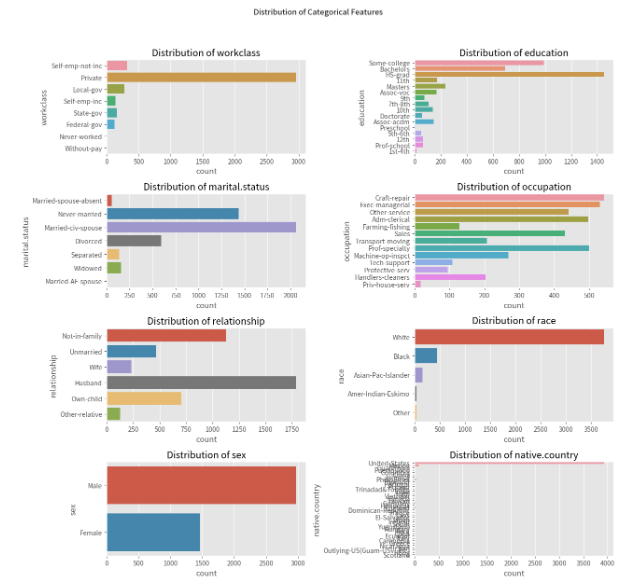

## 5.수치형 feature의 분포

In [ ]:
numeric_columns = df.select_dtypes(include=['int','float']).columns[:-1]

fig, axes = plt.subplots(3, 2, figsize=(13,13))
fig.suptitle('Distribution of numerical Features')

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, bins =30, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')
    axes[i//2, i%2].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

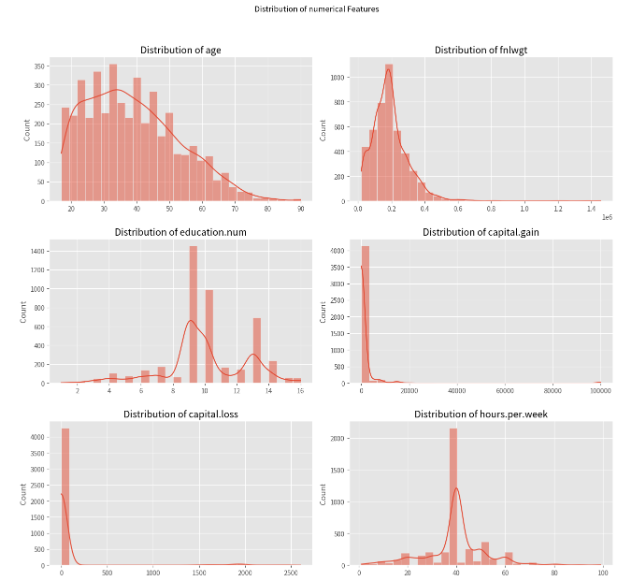

## 6.수치형 feature의 boxplot(상자 수염 플롯)

수치형(numeric) 열(column)에 대한 boxplot(상자 수염 플롯)을 그리고, 데이터의 중앙값, 상자, 수염, 이상치를 시각화하여 데이터 분포와 특성을 파악해봅시다. 이러한 시각화를 통해 데이터셋의 통계적 특성을 이해하고, 이상치나 데이터 분포의 특이점을 식별할 수 있습니다.

[문제 5]

1. 서브플롯 그리드를 생성합니다. 데이터프레임(DataFrame)에서 선택된 수치형 칼럼의 수len(numeric_columns)만큼 서브플롯의 행(row) 개수를 지정합니다.

2. numeric_columns에 있는 각 숫자형 열을 반복하면서 처리합니다. i는 반복 인덱스를 나타내고, col은 현재 처리 중인 숫자형 열의 이름을 나타냅니다.

3. seaborn의 boxplot 함수를 사용하여 상자 수염 플롯을 그립니다. x축 데이터로 데이터프레임의 현재 열 col을 지정해주세요. 제목을 작성할 서브플롯의 위치는i로 지정해주세요.

In [ ]:
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 8))
fig.suptitle('Boxplot of Numeric Features')

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

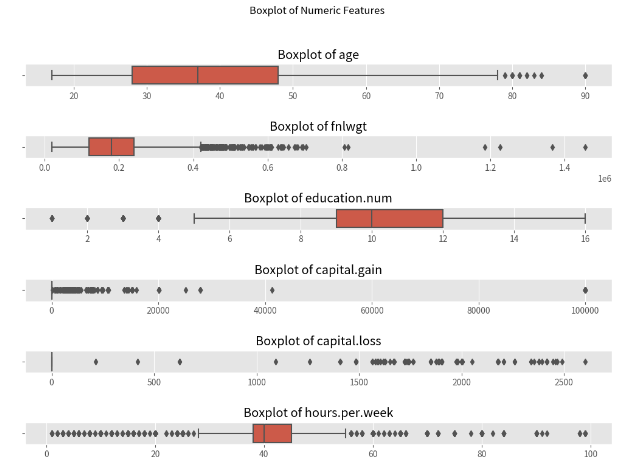

## 7.다중 공선성(VIF) 계산을 통한 피처 상관성 분석
지금까지 feature의 분포에 대한 확인을 진행했습니다. 이제부터는 feature와 feature 간의 서로 어떤 관계 가 있는지 살펴보겠습니다.

### 🔵 feature와 feature의 관계를 살펴보는 이유
첫째 , 이러한 관계를 통해 데이터 내부의 상호작용 및 의존성을 파악할 수 있습니다.
둘째 , 모델링 단계에서 변수 선택 및 특성 공학을 수행하는 데 유용한 통찰력을 얻을 수 있습니다.<br>
따라서 이제 우리는 데이터 내의 흥미로운 관계 및 패턴을 찾아내기 위해 feature와 feature 간의 시각화를 진행하겠습니다.

본격적으로 시각화를 진행하기 전, 다중공선성이 존재하는지 먼저 살펴보도록 하겠습니다.

[문제 6]

VIF 방법 을 이용해서 데이터프레임(DataFrame)의 숫자형 (numeric) 피처들 간의 VIF 값을 계산해보겠습니다.

1. variance_inflation_factor 함수를 statsmodels.stats.outliers_influence에서 가져옵니다.

2. VIF(Variance Inflation Factor) 계산 함수 정의:

- calculate_vif 함수를 정의하여 데이터프레임의 VIF를 계산합니다.
- 빈 DataFrame을 생성합니다.
- variable 이라는 열을 만들고 이 열에는 df의 칼럼명(column)을 저장합니다.
- for i in range(df.shape[1]) 는 데이터프레임 df의 열 수(독립 변수 수)만큼 반복합니다.
- variance_inflation_factor(df.values, i) 는 df의 값(values)과 인덱스 i를 사용하여 i번째 독립 변수의 VIF를 계산합니다.
3. df 데이터프레임에서 정수형(int)과 실수형(float) 변수만 선택합니다. dropna() 함수를 사용하여 선택한 데이터프레임에서 결측값이 존재하는 행(row)을 모두 제거합니다.

4. 정의한 calculate_vif 함수를 사용하여 선택한 수치형 변수(numeric_df)의 VIF를 계산합니다.

In [ ]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

numeric_df = df.select_dtypes(include=['int','float']).dropna()
vif = calculate_vif(numeric_df)
vif

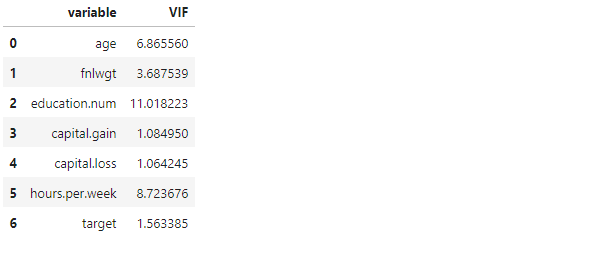